<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [291]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [292]:
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [293]:
df[['ConvertedComp']].head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


c:\Users\FCrovella\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


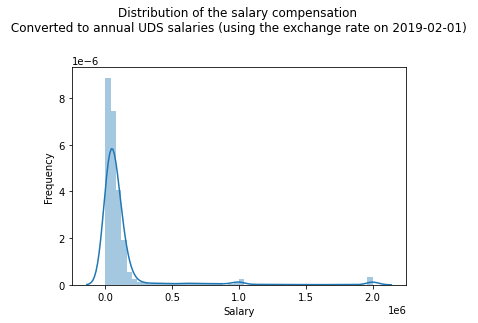

In [294]:
# your code goes here
sns.distplot(df['ConvertedComp'])

plt.title("Distribution of the salary compensation \n Converted to annual UDS salaries (using the exchange rate on 2019-02-01) \n\n")
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

Plot the histogram for the column `ConvertedComp`.


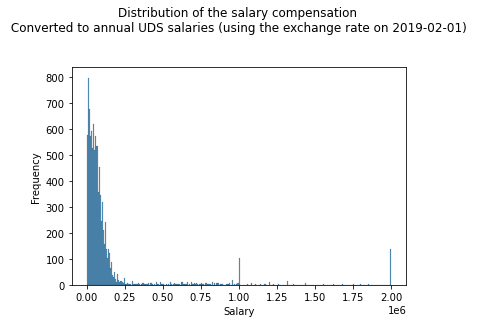

In [295]:
# your code goes here
sns.histplot(df['ConvertedComp'])

plt.title("Distribution of the salary compensation \n Converted to annual UDS salaries (using the exchange rate on 2019-02-01) \n\n")
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

What is the median of the column `ConvertedComp`?


In [296]:
# your code goes here
df[['ConvertedComp']].median()[0]

57745.0

How many responders identified themselves only as a **Man**?


In [297]:
# your code goes here
df['Gender'][df['Gender']=='Man'].value_counts()[0]

10480

In [298]:
df['Gender'][df['Gender']=='Man'].value_counts()[0]

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [299]:
# your code goes here
df['ConvertedComp'][df['Gender']=='Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [300]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [301]:
df['Age'].median()

29.0

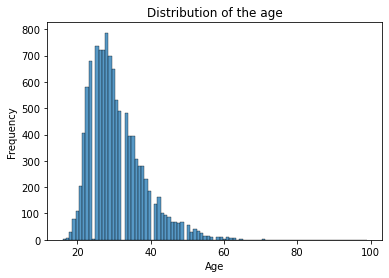

In [302]:
# your code goes here
sns.histplot(df['Age'])

plt.title("Distribution of the age")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


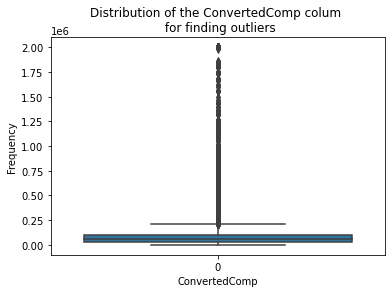

In [303]:
# your code goes here
sns.boxplot(data=df['ConvertedComp'])

plt.title("Distribution of the ConvertedComp colum \n for finding outliers")
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [304]:
df[['ConvertedComp']].median()[0]

57745.0

In [305]:
# your code goes here
ConvertedComp_IQR=df['ConvertedComp'].quantile(0.75)-df['ConvertedComp'].quantile(0.25)
ConvertedComp_IQR

73132.0

In [306]:
ConvertedComp_Q1_025=df['ConvertedComp'].quantile(0.25)
ConvertedComp_Q3_075=df['ConvertedComp'].quantile(0.75)

Find out the upper and lower bounds.


In [307]:
# your code goes here
print('Q1=' + str(ConvertedComp_Q1_025))
print('Q3=' + str(ConvertedComp_Q3_075))

Q1=26868.0
Q3=100000.0


Identify how many outliers are there in the `ConvertedComp` column.


In [308]:
# your code goes here
((df[['ConvertedComp']] < (ConvertedComp_Q1_025 - 1.5 * ConvertedComp_IQR)) | (df[['ConvertedComp']] > (ConvertedComp_Q3_075 + 1.5 * ConvertedComp_IQR))).sum()[0]

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [309]:
# your code goes here

sx=ConvertedComp_Q1_025 - 1.5 * ConvertedComp_IQR
dx=ConvertedComp_Q3_075 + 1.5 * ConvertedComp_IQR
col=df[['ConvertedComp']]

df_new=df[((col >= sx) & (col <= dx)).all(axis=1)]

In [310]:
df_new.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


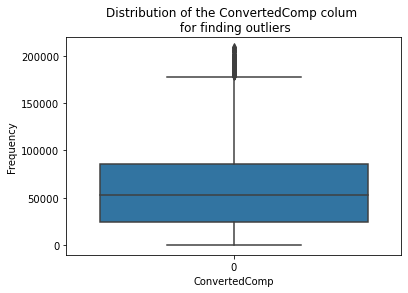

In [311]:
sns.boxplot(data=df_new['ConvertedComp'])

plt.title("Distribution of the ConvertedComp colum \n for finding outliers")
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')

plt.show()

In [312]:
new_ConvertedComp_Q1_025=df_new['ConvertedComp'].quantile(0.25)
new_ConvertedComp_Q3_075=df_new['ConvertedComp'].quantile(0.75)
new_ConvertedComp_IQR=new_ConvertedComp_Q3_075-new_ConvertedComp_Q1_025

In [313]:
((df_new[['ConvertedComp']] < (new_ConvertedComp_Q1_025 - 1.5 * new_ConvertedComp_IQR)) | (df_new[['ConvertedComp']] > (new_ConvertedComp_Q3_075 + 1.5 * new_ConvertedComp_IQR))).sum()[0]

130

In [314]:
df_new['ConvertedComp'].median()

52704.0

In [315]:
df_new['ConvertedComp'].mean()

59883.20838915799

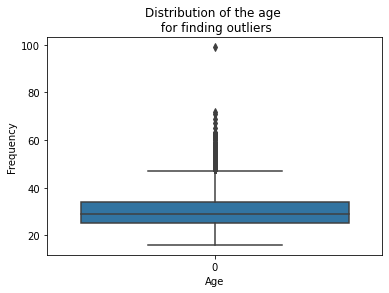

In [316]:
sns.boxplot(data=df_new['Age'])

plt.title("Distribution of the age \n for finding outliers")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [317]:
# your code goes here
df_new_numeric=df_new.select_dtypes('number')

In [318]:
corr_data=df_new_numeric.corr().round(2)

In [319]:
corr_data

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.00,-0.02,0.01,-0.02,0.01,0.00
CompTotal,-0.02,1.00,-0.06,0.00,0.02,0.01
ConvertedComp,0.01,-0.06,1.00,0.03,-0.09,0.40
WorkWeekHrs,-0.02,0.00,0.03,1.00,0.04,0.03
CodeRevHrs,0.01,0.02,-0.09,0.04,1.00,-0.01
Age,0.00,0.01,0.40,0.03,-0.01,1.00


<AxesSubplot:>

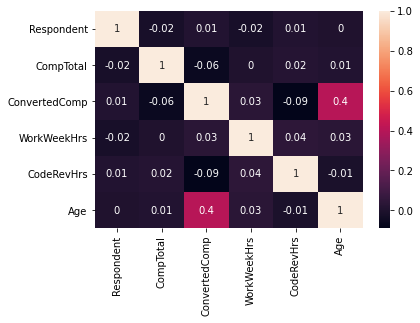

In [320]:
fig, ax = plt.subplots()
sns.heatmap(corr_data,annot=True)

## Authors


Ramesh Sannareddy

Francesco Pio Crovella

### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |
| 2022-05-07        | 0.1     | Francesco Pio Crovella | Created final version of the lab |

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
